#### Modules and global parameters

In [121]:
import numpy as np
import matplotlib.pyplot as plt
from deep_continuation.distribution import get_generator
from deep_continuation.conductivity import second_moment, get_rescaled_sigma, sample_on_grid

Nwn = 128
Nw = 512
wmax = 20
beta = 30
fixstd_list = [6,10,12]
seed = 18


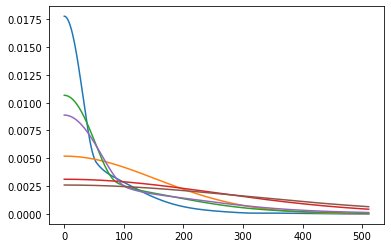

In [122]:
distrib_generator = get_generator(seed=seed)  # Numpy's legacy random number generator for compatibility with older datasets        
distrib = distrib_generator.generate()
sigma_func = lambda w: 0.5 * (distrib(w) + distrib(-w))   
this_std = np.sqrt(second_moment(sigma_func, tail_start=wmax))        

gaussian = lambda x: np.exp(-x**2/2)/np.sqrt(2*np.pi)*np.pi

target = {}
model = {}
for fixstd in fixstd_list: 
    model[fixstd] = get_rescaled_sigma(gaussian, 1, new_std=fixstd)
    target[fixstd] = get_rescaled_sigma(sigma_func, this_std, new_std=fixstd)    

for fixstd in fixstd_list:
    plt.plot(sample_on_grid(target[fixstd], Nw, wmax))
    plt.plot(sample_on_grid(model[fixstd], Nw, wmax))
# plt.legend(title="std")


In [116]:
for fixstd in fixstd_list:
    print(sample_on_grid(target[fixstd], Nw, wmax).sum())
    print(sample_on_grid(model[fixstd], Nw, wmax).sum())

1.0020687357389437
0.9997977153130816
1.0004600692052745
0.9544044741527367
1.0000578535821492
0.9042750171868625


Weird! these gaussians rarely sum to 1. The tails extend outside the sampled range. The dataset is prepared like this as well, but the neural net has a Softmax output. This must result in a systematic error. I now wonder if that systematic error happens more in the rescaled output than in the raw case.

Are there more spectra that sum to one in the rescaled dataset (easier for the neural net)?


